# FTSE 100 Double Tap Back Test

In this notebook will carry out time series analysis using different moving averages to forecast the ftse 100 price. We'll be using the 4hr timeframe for this project, and we'll be attemptime to forecast the closing price.  

In [1]:
#import libraries

import pandas as pd
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
!ls


FTSE4 Data Prep.ipynb    FTSE_ma_forecaster.ipynb
FTSE4.csv                ftse_base4.csv


## Read in and review data

In [5]:
ftse = pd.read_csv("ftse_base4.csv", parse_dates=['time'])

In [6]:
ftse.head()

,time,open,high,low,close
0,2020-04-23 11:00:00,5770.0,5822.0,5755.6,5798.1
1,2020-04-23 15:00:00,5797.9,5847.9,5762.1,5773.2
2,2020-04-23 19:00:00,5773.2,5796.8,5744.1,5769.5
3,2020-04-23 23:00:00,5756.8,5770.2,5731.6,5740.2
4,2020-04-24 03:00:00,5740.0,5755.0,5720.3,5744.3


In [7]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    663 non-null    datetime64[ns]
 1   open    663 non-null    float64       
 2   high    663 non-null    float64       
 3   low     663 non-null    float64       
 4   close   663 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 26.0 KB


In [8]:
#Initially let's split out the datetime into some component parts
ftse['date'] = ftse.apply(lambda row : row.time.date(), axis = 1)
ftse['time_24h'] = ftse.apply(lambda row : row.time.time(), axis=1)

In [9]:
ftse.head()

,time,open,high,low,close,date,time_24h
0,2020-04-23 11:00:00,5770.0,5822.0,5755.6,5798.1,2020-04-23,11:00:00
1,2020-04-23 15:00:00,5797.9,5847.9,5762.1,5773.2,2020-04-23,15:00:00
2,2020-04-23 19:00:00,5773.2,5796.8,5744.1,5769.5,2020-04-23,19:00:00
3,2020-04-23 23:00:00,5756.8,5770.2,5731.6,5740.2,2020-04-23,23:00:00
4,2020-04-24 03:00:00,5740.0,5755.0,5720.3,5744.3,2020-04-24,03:00:00


In [10]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      663 non-null    datetime64[ns]
 1   open      663 non-null    float64       
 2   high      663 non-null    float64       
 3   low       663 non-null    float64       
 4   close     663 non-null    float64       
 5   date      663 non-null    object        
 6   time_24h  663 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 36.4+ KB


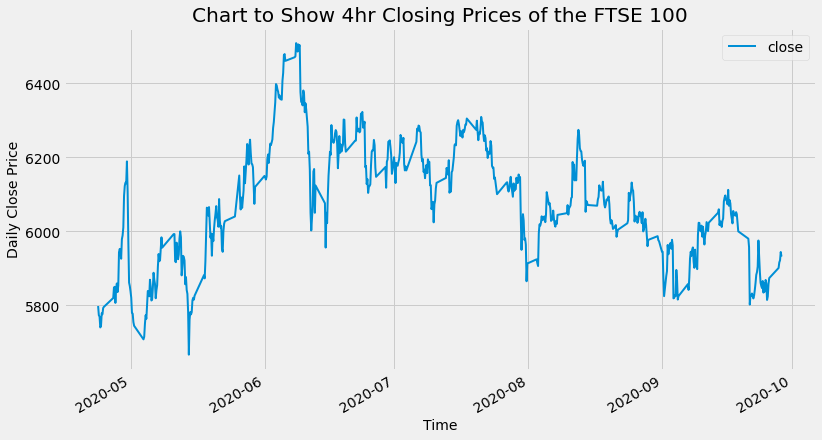

In [11]:
#Visualise the ftse for the available period
ftse.plot(y="close", x='time', figsize=(12,7), linewidth=2)

plt.ylabel("Daily Close Price", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.title("Chart to Show 4hr Closing Prices of the FTSE 100")
plt.show()

## Create the moving averages

In [12]:
ftse["ma3"] = ftse['close'].shift(1).rolling(window=3).mean()
ftse['ma9'] = ftse['close'].shift(1).rolling(window=9).mean()

In [13]:
ftse.head()
#We've introduced the ma's but in doing so also created NaN values

,time,open,high,low,close,date,time_24h,ma3,ma9
0,2020-04-23 11:00:00,5770.0,5822.0,5755.6,5798.1,2020-04-23,11:00:00,NaN,NaN
1,2020-04-23 15:00:00,5797.9,5847.9,5762.1,5773.2,2020-04-23,15:00:00,NaN,NaN
2,2020-04-23 19:00:00,5773.2,5796.8,5744.1,5769.5,2020-04-23,19:00:00,NaN,NaN
3,2020-04-23 23:00:00,5756.8,5770.2,5731.6,5740.2,2020-04-23,23:00:00,5780.266667,NaN
4,2020-04-24 03:00:00,5740.0,5755.0,5720.3,5744.3,2020-04-24,03:00:00,5760.966667,NaN


In [14]:
ftse.isna().sum()

time        0
open        0
high        0
low         0
close       0
date        0
time_24h    0
ma3         3
ma9         9
dtype: int64

In [15]:
ftse.dropna(inplace=True)

In [16]:
ftse.head()

,time,open,high,low,close,date,time_24h,ma3,ma9
9,2020-04-26 23:00:00,5796.8,5824.3,5772.9,5819.8,2020-04-26,23:00:00,5788.033333,5774.200000
10,2020-04-27 03:00:00,5819.7,5859.9,5818.3,5848.0,2020-04-27,03:00:00,5802.733333,5776.611111
11,2020-04-27 07:00:00,5848.3,5859.2,5817.9,5850.0,2020-04-27,07:00:00,5821.200000,5784.922222
12,2020-04-27 11:00:00,5850.1,5854.6,5792.9,5806.6,2020-04-27,11:00:00,5839.266667,5793.866667
13,2020-04-27 15:00:00,5806.7,5854.1,5799.4,5845.1,2020-04-27,15:00:00,5834.866667,5801.244444


## Split the data into dependent and target sets and train and test sets

In [17]:
#create the dependent dataset
X = ftse[['ma3', 'ma9']]

#create the target feature
y = ftse["close"]

In [18]:
#Split data into training and test sets with a ratio of 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [19]:
#Fit the model to the training data
lr = LinearRegression().fit(X_train, y_train)

In [20]:
#Predict our target values in the test set
pred = lr.predict(X_test)

In [21]:
#Create a dataframe feature of our newly predicted target feature values
pred_data = pd.DataFrame(pred, index=y_test.index, columns=["predicted"])

In [22]:
#review the predicted value data set
pred_data.head()

,predicted
532,6038.246607
533,6041.805906
534,6027.328476
535,6021.225365
536,6008.003771


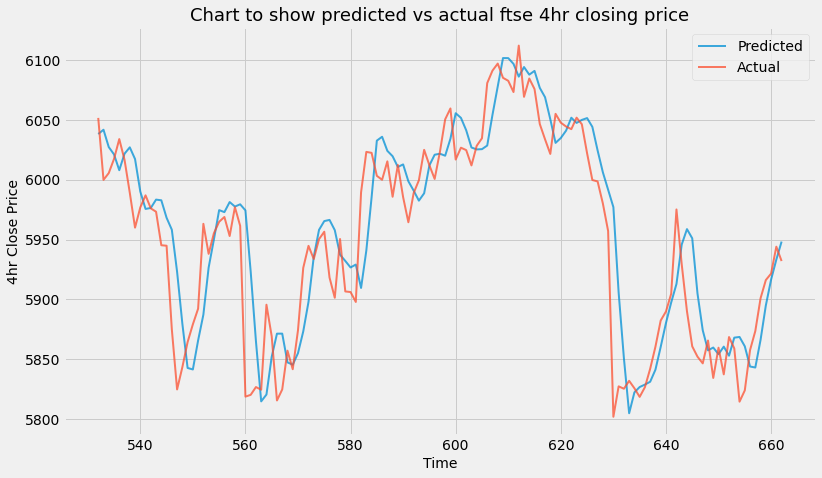

In [23]:
#Let's plot the predicted against the actual values
pred_data.plot(figsize=(12,7), linewidth=2, alpha=0.75)
y_test.plot(linewidth=2, alpha=0.75)
plt.ylabel("4hr Close Price", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.title("Chart to show predicted vs actual ftse 4hr closing price", fontsize=18)
plt.legend(["Predicted", "Actual"])
plt.show()

Looks like some semblance of accuracy here from reviewing the graph. Let's calculate our accuracy metrics. 

In [24]:
#Check out the r_squared score to find out how accurate we've been
print(f"Our r_square score is {round(r2_score(y_test, pred), 3)}")

Our r_square score is 0.766


Ok not a terrible result. Our data set is relatively small, only 663 data points, so we could hunt out a bigger set. While we're doing that let's play with this and make some predictions over the next few days of real time data coming in from the ftse. 

In [25]:
y_test_df = y_test.to_frame()

In [26]:
actual_vs_pred = y_test_df.join(pred_data)

In [27]:
#View a spot check of actual vs predicted prices
actual_vs_pred.loc[600:620]

,close,predicted
600,6016.9,6055.617151
601,6026.8,6051.724374
602,6024.8,6041.373862
603,6012.0,6026.972704
604,6028.4,6025.376037
605,6034.7,6025.583363
606,6080.8,6028.607796
607,6091.2,6054.283354
608,6097.1,6078.026776
609,6085.2,6101.695572


Despite the r2 value being in the realms of decency this may not be the best metric to evaluate at this stage. When looking at the spot check slice above we measure the following:

1) When comparing "previous actual close to predicted close" direction to "previous actual close to actual close" direction: \
We get a score of 7/20 correct forecasts purely in terms of estimating the direction of the market

2) When comparing "previous predicted close to predicted close" direction to "previous actual close to actual close" direction: \
We get a score of 12/20 correct forecasts purely in terms of estimating the direction of the market. 